<a href="https://colab.research.google.com/github/Sanjayvaradha/shape_analysis_classification/blob/main/Shape_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import cv2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data="/content/drive/MyDrive/aiviz_data"

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data)

Found 600 files belonging to 2 classes.


In [ ]:
data_numpy = data.as_numpy_iterator()

In [ ]:
batch=data_numpy.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

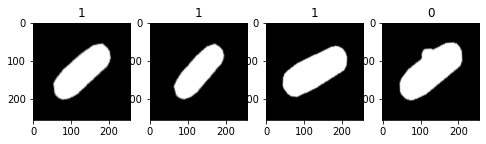

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(8,8))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.3)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [ ]:
print(len(train),len(val))

14 5


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
#logdir='/content/drive/MyDrive/aiviz_data_model/new_logs'

In [ ]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
14/14 [==============================] - 3s 178ms/step - loss: 0.7082 - accuracy: 0.5112 - val_loss: 0.6890 - val_accuracy: 0.5658
Epoch 2/40
14/14 [==============================] - 4s 247ms/step - loss: 0.6820 - accuracy: 0.6049 - val_loss: 0.6614 - val_accuracy: 0.6447
Epoch 3/40
14/14 [==============================] - 3s 162ms/step - loss: 0.6657 - accuracy: 0.6071 - val_loss: 0.6571 - val_accuracy: 0.6053
Epoch 4/40
14/14 [==============================] - 3s 168ms/step - loss: 0.6389 - accuracy: 0.6674 - val_loss: 0.5951 - val_accuracy: 0.6579
Epoch 5/40
14/14 [==============================] - 3s 157ms/step - loss: 0.5750 - accuracy: 0.7009 - val_loss: 0.5422 - val_accuracy: 0.7171
Epoch 6/40
14/14 [==============================] - 3s 154ms/step - loss: 0.5250 - accuracy: 0.7455 - val_loss: 0.4783 - val_accuracy: 0.7697
Epoch 7/40
14/14 [==============================] - 2s 153ms/step - loss: 0.4840 - accuracy: 0.7701 - val_loss: 0.4153 - val_accuracy: 0.7895
Epoch 

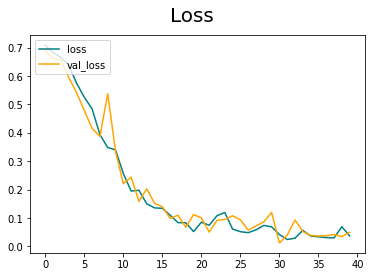

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

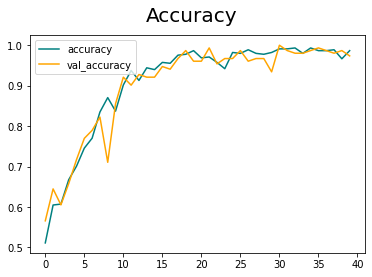

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [4]:
from tensorflow.keras.models import load_model

In [ ]:
#model.save("/content/drive/MyDrive/aiviz_data_model/new_shape_analysis.h5")

In [5]:
new_model = load_model("/content/drive/MyDrive/aiviz_data_model/new_shape_analysis.h5")

In [6]:
img=cv2.imread('/content/drive/MyDrive/test/defect/defect_00006008-9b93-45df-9c0c-1ae38117c0c7.png')


In [33]:
def n_image(image):
  img=cv2.imread(image)

  resize = tf.image.resize(img, (256,256))
  print(resize.shape)
  yhat = new_model.predict(np.expand_dims(resize/255, 0))
  print(yhat)
  prediction=["good" if i > 0.5 else "defect" for i in yhat]

  plt.imshow(resize.numpy().astype(int))
  plt.title(f'prediction:{prediction}')
  plt.show()


(256, 256, 3)
[[0.01348233]]


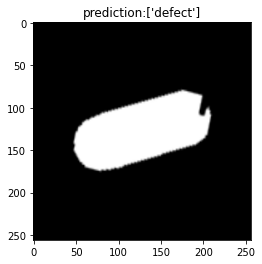

In [34]:
image='/content/drive/MyDrive/test/defect/defect_00006008-9b93-45df-9c0c-1ae38117c0c7.png'
n_image(image)


In [29]:
test_img= '/content/drive/MyDrive/test'

In [30]:
test_data = tf.keras.utils.image_dataset_from_directory(test_img,batch_size=1)

Found 120 files belonging to 2 classes.


In [31]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [32]:
score=new_model.evaluate(test_data)

120/120 [==============================] - 25s 190ms/step - loss: 0.3379 - accuracy: 0.9167


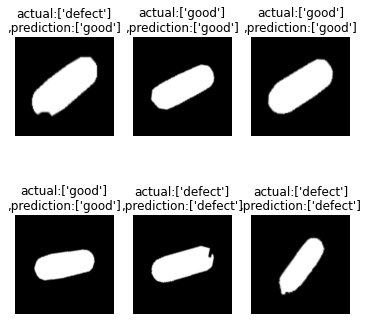

In [ ]:
fig,ax  = plt.subplots(figsize=(6,6))

for idx,batch in enumerate(test_data):
  if idx>5:
    break
    
  ax=plt.subplot(2,3,idx+1) 
  X, y = batch
  pred = new_model.predict(X)
  actual= ["good" if i ==1 else "defect" for i in y]
  prediction=["good" if i > 0.5 else "defect" for i in pred]


  plt.title(f'actual:{actual}\n,prediction:{prediction}')
  plt.imshow(X[0])
  ax.axis('off')

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
for batch in test_data.as_numpy_iterator(): 
    X, y = batch
    yhat = new_model.predict(X)
    Precision.update_state(y, yhat)
    Recall.update_state(y, yhat)
    BinaryAccuracy.update_state(y, yhat)
    

In [ ]:
print(Precision.result(), Recall.result(), aBinaryAccuracycc.result())

tf.Tensor(0.8787879, shape=(), dtype=float32) tf.Tensor(0.96666664, shape=(), dtype=float32) tf.Tensor(0.9166667, shape=(), dtype=float32)


In [ ]:
def predict(model):
  predictions=[]
  actual=[]
  for batch in test_data.as_numpy_iterator(): 
      X, y = batch
      test_prediction = model.predict(X)
      predictions.append(test_prediction)
      actual.append(y)
  total_predictions= np.concatenate(predictions)
  true_total = np.concatenate(actual)
  total_predictions=[1 if i > 0.5 else 0 for i in total_predictions]
  return true_total, total_predictions

In [ ]:
true_total,total_predictions= predict(new_model)

In [ ]:
len(total_predictions)

120

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_total,total_predictions,labels=[0,1])

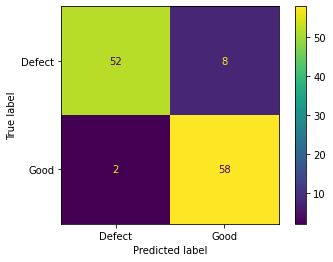

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Defect','Good'])
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['defect', 'good']
print(classification_report(true_total, total_predictions, target_names=target_names))

              precision    recall  f1-score   support

      defect       0.96      0.87      0.91        60
        good       0.88      0.97      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

